# Nuclear Power Stations

## Data
https://en.wikipedia.org/wiki/List_of_nuclear_power_stations

In [12]:
FULL_DATA = 'nuclear-stations-complete.csv'

## Load data

In [13]:
import csv


with open(FULL_DATA, 'r', encoding="utf-8") as f:
    reader = csv.DictReader(f, delimiter=';')
    nuclear_list = []
    for row in reader:
        nuclear_list.append({
            'name': row['name'],
            'short_name': row['short_name'],
            'country': row['country'], 
            'units': row['units'], 
            'capacity': row['capacity'],
            'coordinates': row['coordinates'],
            'latitude': row['latitude'],
            'longitude': row['longitude'],
            'coordinates_dms': row['coordinates_dms'],
            'status': row['status'],
            'notes': row['notes']
        })

## Plot using markers

In [14]:
def create_popup_text(data):
    """Creates HTML for the popup texts give a dictionary of data"""
    popup_text = f"""<strong>{data['short_name']}</strong> ({data['status']})<br>
                    <small>Country: {data['country']}<br>
                    Units: {data['units']}<br>
                    Capacity: {data['capacity']} MWe<br>
                    Coordinates: {data['coordinates_dms']}<br>
                    Notes: {data['notes']}</small>"""
    return popup_text

In [15]:
import folium


# Create map
m = folium.Map(
    location=[25, 10],
    zoom_start=2,
    min_zoom=2
)

# Add markers for each power station
for station in nuclear_list:
    if station['status'] == 'in service':
        folium.Marker(
            location=[station['latitude'], station['longitude']], 
            tooltip=station['name'],
            popup=create_popup_text(station),
            icon=folium.Icon(color='blue', prefix='fa', icon='circle')
        ).add_to(m)
    elif station['status'] == 'under construction':
        folium.Marker(
            location=[station['latitude'], station['longitude']], 
            tooltip=station['name'],
            popup=create_popup_text(station),
            icon=folium.Icon(color='gray', prefix='fa', icon='circle')
        ).add_to(m)
    elif station['status'] == 'shut down':
        folium.Marker(
            location=[station['latitude'], station['longitude']], 
            tooltip=station['name'],
            popup=create_popup_text(station),
            icon=folium.Icon(color='red', prefix='fa', icon='circle')
        ).add_to(m)

# Add legend
legend_html = """
     <div style="position: fixed; bottom: 25px; left: 25px; width: 150px; z-index:9999; font-size:14px;"">
     &nbsp; <i class="fa fa-map-marker fa-2x" style="color:#37A6D8"></i> In service<br>
     &nbsp; <i class="fa fa-map-marker fa-2x" style="color:#575757"></i> Under construction<br>
     &nbsp; <i class="fa fa-map-marker fa-2x" style="color:#D03C29"></i> Shut down</div>"""
m.get_root().html.add_child(folium.Element(legend_html))
m

## Plot using circles

In [16]:
# Create map
m2 = folium.Map(
    location=[25, 10],
    zoom_start=2,
    min_zoom=2
)

# Add markers for each power station
for station in nuclear_list:
    if station['status'] == 'in service':
        folium.Circle(
            location=[station['latitude'], station['longitude']],
            tooltip=station['name'],
            popup=create_popup_text(station),
            radius=int(station['capacity'])*10,
            opacity=0.8,
            fill=True,
    #         fill_opacity=1
        ).add_to(m2)
        
    elif station['status'] == 'under construction':
        folium.Circle(
            location=[station['latitude'], station['longitude']],
            tooltip=station['name'],
            popup=create_popup_text(station),
            radius=int(station['capacity'])*10,
            opacity=0.8,
            color='gray',
            fill=True,
            fill_color='gray',
    #         fill_opacity=1
        ).add_to(m2)
    
    elif station['status'] == 'shut down':
        folium.Circle(
            location=[station['latitude'], station['longitude']],
            tooltip=station['name'],
            popup=create_popup_text(station),
            radius=int(station['capacity'])*10,
            opacity=0.8,
            color='red',
            fill=True,
            fill_color='red',
    #         fill_opacity=1
        ).add_to(m2)

# Add legend
legend_html2 = """
     <div style="position: fixed; bottom: 25px; left: 25px; width: 150px; z-index:9999; font-size:14px;"">
     &nbsp; <span style="height: 15px; width: 15px; background-color: #37A6D8; border-radius: 50%; display: inline-block;"></span> In service<br>
     &nbsp; <span style="height: 15px; width: 15px; background-color: #575757; border-radius: 50%; display: inline-block;"></span> Under construction<br>
     &nbsp; <span style="height: 15px; width: 15px; background-color: #D03C29; border-radius: 50%; display: inline-block;"></span> Shut down</div>"""
m2.get_root().html.add_child(folium.Element(legend_html2))


# Save map
m2.save('nuclear-stations.html')

m2

## Installed capacity by country

In [17]:
import pandas as pd


# Load data into Pandas dataframe
df = pd.read_csv(FULL_DATA, delimiter=';')
df.head()

,name,short_name,country,units,capacity,coordinates,latitude,longitude,coordinates_dms,status,notes
0,Almaraz Nuclear Power Station,Almaraz,Spain,2.0,2017,"-5.69694444444445,39.8080555555556,0",39.808056,-5.696944,39°48′29″N 05°41′49″W,in service,NaN
1,Angra Nuclear Power Station,Angra,Brazil,2.0,1884,"-44.4738888888889,-23.0083333333333,0",-23.008333,-44.473889,23°00′30″S 44°28′26″W,in service,"1,245 MW reactor under construction"
2,Arkansas Nuclear One,ANO,United States,2.0,1839,"-93.2313888888889,35.3102777777778,0",35.310278,-93.231389,35°18′37″N 93°13′53″W,in service,NaN
3,Ascó Nuclear Power Station,Ascó,Spain,2.0,1992,"0.569444444444444,41.2,0",41.200000,0.569444,41°12′00″N 00°34′10″E,in service,NaN
4,Atucha Nuclear Power Station,Atucha,Argentina,2.0,1027,"-59.205,-33.9675,0",-33.967500,-59.205000,33°58′3″S 59°12′18″W,in service,NaN


In [18]:
# Get total capacities by country
capacities = df.groupby(['status', 'country'])['capacity'].sum()
capacities

status              country       
in service          Argentina          1027
                    Belgium            5927
                    Brazil             1884
                    Bulgaria           1906
                    Canada            12990
                    China             41569
                    Czech Republic     4092
                    Finland            2754
                    France            63130
                    Germany            9509
                    Hungary            1889
                    India              4199
                    Japan             25864
                    Mexico             1300
                    Pakistan           1230
                    Romania            1300
                    Russia            26818
                    South Africa       1830
                    South Korea       23812
                    Spain              8921
                    Sweden             8187
                    Switzerland        11

In [62]:
# Get stations 'in service' and order by capacity
capacities_service = capacities['in service'].sort_values(ascending=False)

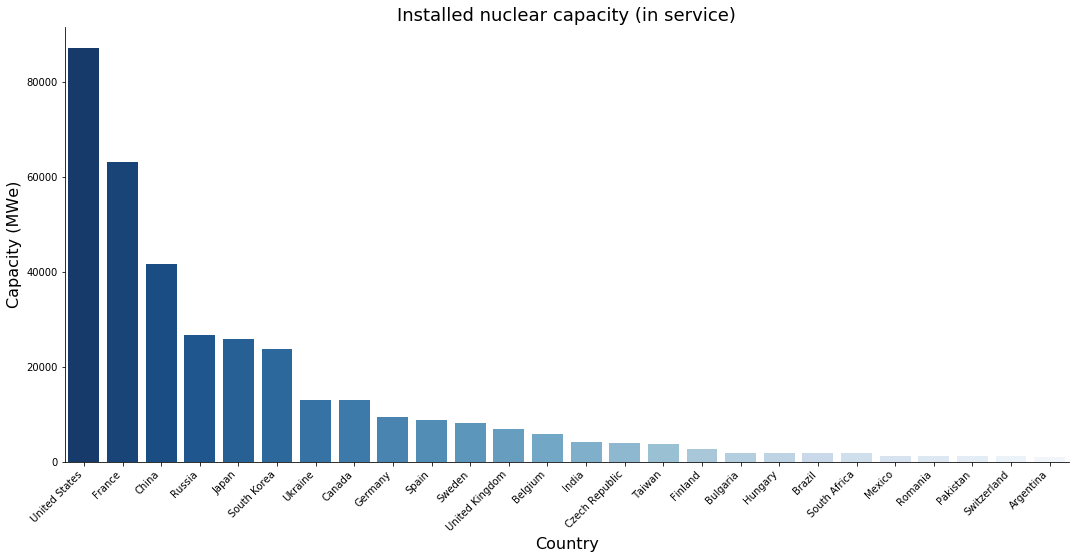

In [67]:
# Plot stations 'in service' capacity 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize

# from matplotlib import rc
# rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)


figsize(18,8)
ax = sns.barplot(capacities_service.index, capacities_service.values, palette='Blues_r')

# Style the plot
# ax.set(xlabel='Country', ylabel='Capacity (MWe)')
plt.title('Installed nuclear capacity (in service)', fontsize=18)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Capacity (MWe)', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
sns.despine(bottom=sns.despine(bottom=True, top=True, trim=False)
, top=True, trim=False)
# plt.setp(f.axes, yticks=[])
# plt.tight_layout(h_pad=2)

In [68]:
# Make dataframe and convert NaN to zeros
capacities_status = capacities.unstack('status').fillna(0)

# Add total column
capacities_status['total'] = capacities_status.sum(axis=1)

# Order by total and remove 'total' column
capacities_status = capacities_status.sort_values(by='total', ascending=False).drop(columns='total')

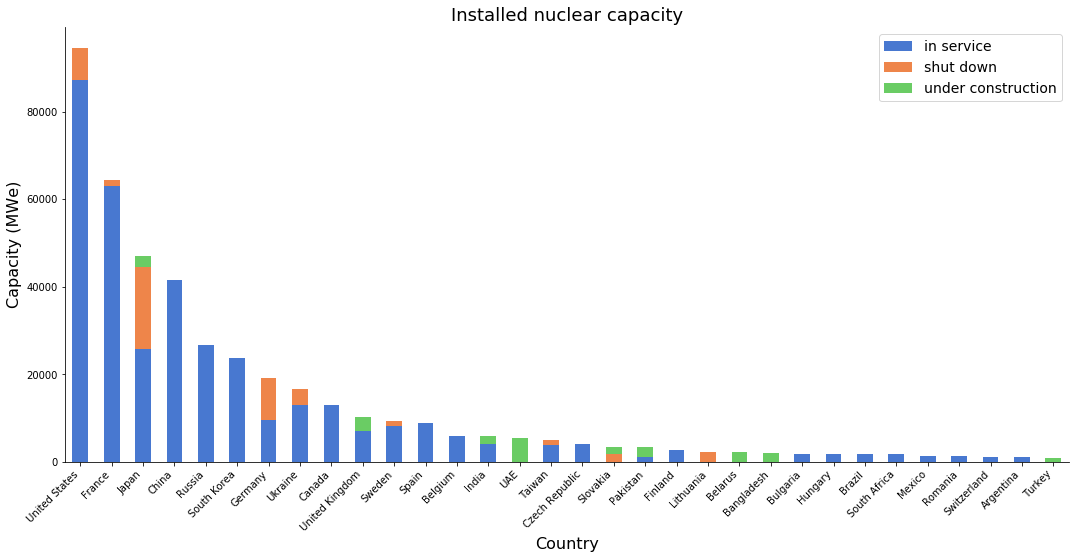

In [72]:
# Plot stations capacity per status
figsize(18,8)

sns.set_palette('muted')

ax2 = capacities_status.plot(kind='bar', stacked=True);

# Style the plot
plt.title('Installed nuclear capacity', fontsize=18)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Capacity (MWe)', fontsize=16)
ax2.legend(prop=dict(size=14))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right');
sns.despine(bottom=False, top=True, trim=False)
# plt.setp(f.axes, yticks=[])
# plt.tight_layout(h_pad=2)